## 1. Perkenalan

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : car-price-prediction.csv

Objective : 

# 2. Import Libraries

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [ ]:
# Installing library feature-engine
!pip install feature-engine

In [92]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
import json
import pickle

#3. Data Loading

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [93]:
# Load data csv from github
data = pd.read_csv('/content/car-price-prediction.txt')

In [94]:
# Copy data to make sure the orinal are untouchable
copyData = data.copy()

In [95]:
# show dataset
copyData

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A4,2019,26695,Semi-Auto,5000,Diesel,145,51.4,2.0
1,Mercedez,C Class,2010,5999,Manual,68000,Diesel,145,56.5,2.1
2,Vauxhall,Meriva,2016,6790,Manual,27772,Petrol,145,47.1,1.4
3,VW,Shuttle,2019,28000,Semi-Auto,10074,Diesel,145,32.8,2.0
4,Vauxhall,Corsa,2017,7999,Manual,22322,Petrol,30,54.3,1.4
...,...,...,...,...,...,...,...,...,...,...
23995,BMW,X3,2019,31950,Semi-Auto,7721,Diesel,145,54.3,2.0
23996,Audi,Q2,2018,20500,Automatic,6734,Diesel,145,46.3,1.6
23997,Hyundai,Tucson,2019,17490,Manual,8009,Petrol,145,34.9,1.6
23998,Vauxhall,Corsa,2013,3998,Manual,58350,Petrol,125,51.4,1.2


ada `24,000` data yang di upload dan akan dianalisa kemudian

In [96]:
# Check data info
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         24000 non-null  object 
 1   model         24000 non-null  object 
 2   year          24000 non-null  int64  
 3   price         24000 non-null  int64  
 4   transmission  24000 non-null  object 
 5   mileage       24000 non-null  int64  
 6   fuelType      24000 non-null  object 
 7   tax           24000 non-null  int64  
 8   mpg           24000 non-null  float64
 9   engineSize    24000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.8+ MB


dari info diatas dapat dilihat ada 10 kolom data dan datanya sudah clean dari missing value

In [97]:
# Check data describe
copyData.describe()

,year,price,mileage,tax,mpg,engineSize
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,2017.172000,17154.666208,22677.318208,122.455625,54.513126,1.676517
std,2.072139,9904.741481,20898.280371,60.220629,16.420648,0.552661
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10390.000000,6981.250000,125.000000,45.600000,1.400000
50%,2017.000000,14995.000000,17155.000000,145.000000,54.300000,1.600000
75%,2019.000000,21286.250000,32093.500000,145.000000,61.400000,2.000000
max,2060.000000,140319.000000,300000.000000,580.000000,470.800000,6.200000


dari data diatas dapat dilihat untuk rata-rata harga mobil ada di kisaran `14995` dengan rata-rata *engineSize* di `1.6`

# 4. Exploratory Data Analysis (EDA)

---



Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [98]:
# Function to see mpg >= 60 with status superEfficient
superEff = copyData.loc[copyData['mpg'] >= 60]
superEff

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6,Ford,Fiesta,2017,12298,Manual,9360,Petrol,0,65.7,1.0
8,Mercedez,E Class,2018,21990,Automatic,25000,Diesel,145,65.7,2.0
11,Ford,Fiesta,2018,11000,Manual,12351,Petrol,145,65.7,1.0
12,Hyundai,I10,2018,7690,Manual,10173,Petrol,145,60.1,1.0
16,BMW,3 Series,2019,22198,Semi-Auto,13004,Diesel,145,67.3,2.0
...,...,...,...,...,...,...,...,...,...,...
23985,Skoda,Fabia,2019,12998,Manual,2423,Petrol,145,60.1,1.0
23989,Hyundai,Tucson,2017,13998,Manual,24602,Diesel,150,61.7,1.7
23992,Ford,Fiesta,2012,4995,Manual,54700,Diesel,20,68.9,1.4
23993,VW,Polo,2016,9690,Manual,34090,Petrol,20,60.1,1.2


mobil dengan status super efficient dimana `mpg` >= 60 ada sebanyak `8,091`

In [99]:
# Function to see mpg >= 50 and < 60 with status efficient
efficient = copyData[(copyData['mpg'] >= 50) & (copyData['mpg'] < 60)]
efficient

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A4,2019,26695,Semi-Auto,5000,Diesel,145,51.4,2.0
1,Mercedez,C Class,2010,5999,Manual,68000,Diesel,145,56.5,2.1
4,Vauxhall,Corsa,2017,7999,Manual,22322,Petrol,30,54.3,1.4
15,Vauxhall,Corsa,2016,7640,Manual,13045,Petrol,30,55.4,1.4
17,Vauxhall,Corsa,2017,8300,Manual,19768,Petrol,145,54.3,1.4
...,...,...,...,...,...,...,...,...,...,...
23967,Ford,Focus,2018,13490,Manual,18100,Petrol,145,57.7,1.0
23973,BMW,3 Series,2019,30543,Semi-Auto,6294,Diesel,145,52.3,2.0
23981,Hyundai,I10,2017,7695,Manual,17500,Petrol,30,57.7,1.2
23995,BMW,X3,2019,31950,Semi-Auto,7721,Diesel,145,54.3,2.0


mobil dengan status *efficient* dimana `mpg` >= 50 dan < 60 ada sebanyak `7.048`

In [100]:
# Function to see mpg >= 35 and < 50 with status decent
decent = copyData[(copyData['mpg'] >= 35) & (copyData['mpg'] < 50)]
decent

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2,Vauxhall,Meriva,2016,6790,Manual,27772,Petrol,145,47.1,1.4
5,Skoda,Karoq,2019,24396,Manual,4599,Diesel,145,42.8,2.0
7,Audi,A3,2016,20499,Automatic,27809,Petrol,200,40.9,2.0
9,Mercedez,GLC Class,2019,34350,Automatic,12623,Diesel,145,44.8,2.0
10,Hyundai,I10,2019,10220,Manual,100,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
23988,Vauxhall,Mokka X,2017,9899,Manual,36652,Petrol,145,42.2,1.6
23990,Hyundai,Kona,2018,14690,Manual,32157,Petrol,145,44.1,1.0
23991,Vauxhall,Corsa,2019,11529,Manual,13028,Petrol,150,43.5,1.4
23996,Audi,Q2,2018,20500,Automatic,6734,Diesel,145,46.3,1.6


mobil dengan status *decent* dimana `mpg` >= 35 dan < 50 ada sebanyak `7,677`

In [101]:
# Function to see mpg >= 25 and < 35 with status standard 
standard =  copyData[(copyData['mpg'] >= 25) & (copyData['mpg'] < 35)]
standard

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3,VW,Shuttle,2019,28000,Semi-Auto,10074,Diesel,145,32.8,2.0
19,Hyundai,I30,2019,24970,Manual,1500,Petrol,145,34.0,2.0
32,Audi,A3,2019,30500,Semi-Auto,266,Petrol,150,34.9,2.0
66,VW,Golf,2019,30902,Semi-Auto,3750,Petrol,145,32.8,2.0
68,Mercedez,GLC Class,2019,51500,Semi-Auto,23500,Petrol,150,27.4,4.0
...,...,...,...,...,...,...,...,...,...,...
23960,Mercedez,GLC Class,2019,47980,Semi-Auto,3999,Petrol,145,27.4,3.0
23968,BMW,1 Series,2019,30783,Semi-Auto,6499,Petrol,145,34.5,2.0
23977,Ford,Mustang,2020,38489,Automatic,3500,Petrol,145,30.7,2.3
23987,Mercedez,A Class,2019,17810,Manual,907,Petrol,145,28.5,1.3


mobil dengan status *standard* dimana `mpg` >= 25 dan < 35 ada sebanyak `1,122`

In [102]:
# Function to see mpg < 25
notEff = copyData[(copyData['mpg'] < 25)]
notEff

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
480,BMW,X7,2020,79566,Semi-Auto,1000,Petrol,145,24.8,3.0
486,Mercedez,C Class,2014,28990,Semi-Auto,19562,Petrol,570,23.5,6.2
2058,Hyundai,Ioniq,2020,23895,Automatic,4152,Hybrid,135,1.1,1.6
3231,Mercedez,A Class,2019,129990,Automatic,1000,Petrol,145,24.8,4.0
3454,Audi,R8,2019,109990,Automatic,6954,Petrol,145,21.6,5.2
...,...,...,...,...,...,...,...,...,...,...
22276,Mercedez,A Class,2019,109445,Automatic,195,Petrol,145,22.6,4.0
22861,BMW,M5,2019,69948,Automatic,13000,Petrol,150,24.1,4.4
23132,BMW,X3,2019,57680,Automatic,1405,Petrol,145,24.8,3.0
23424,Mercedez,GLE Class,2016,48480,Semi-Auto,19466,Petrol,570,23.9,5.5


mobil dengan status *not efficient* dimana `mpg` < 25 ada sebanyak `62`

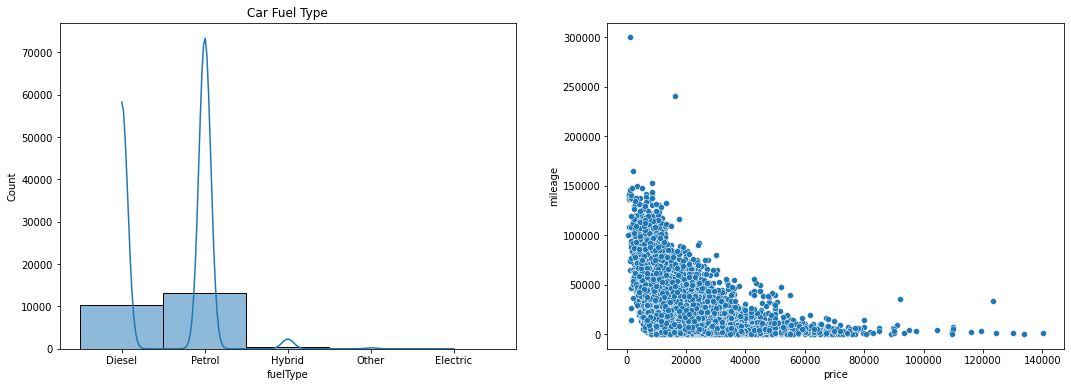

In [103]:
# Create histogram 
plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
sns.histplot(copyData['fuelType'], kde=True, bins=50)
plt.title('Car Fuel Type')

# Create scatterplot
plt.subplot(1, 2, 2)
sns.scatterplot(x='price', y='mileage', data=copyData)
plt.show()

Data dilihat dari visualisasi diatas untuk kendaraan dengan *fuel type* *petrol* memiliki kuantitas terbanyak. Dan hubungan dengan `mileage` yang tinggi maka akan berpengaruh terhadap `price` mobil bekas tersebut. Dari graphic diatas dapat dilihat bahwa mobil dengan `mileage` > `100,000` berada dikisaran harga `500` sampai dibawah `10,000`. 

In [104]:
# Check korelasi antara price dan mileage
corr = copyData['mileage'].corr(copyData['price'])

print('Nilai korelasinya : ', corr)

Nilai korelasinya :  -0.4205358393082591


nilai korelasinya bersifat negatif maka dapat disimpulkan bahwa memang benar ada keterkaitan antara `mileage` yang tinggi maka `price` akan semakin rendah. 

# 5. Feature Engineering

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan

## 5.1 Split data between X and y

In [105]:
# Splitting data
X = copyData.drop(['price'], axis = 1)
y = copyData['price']
X

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A4,2019,Semi-Auto,5000,Diesel,145,51.4,2.0
1,Mercedez,C Class,2010,Manual,68000,Diesel,145,56.5,2.1
2,Vauxhall,Meriva,2016,Manual,27772,Petrol,145,47.1,1.4
3,VW,Shuttle,2019,Semi-Auto,10074,Diesel,145,32.8,2.0
4,Vauxhall,Corsa,2017,Manual,22322,Petrol,30,54.3,1.4
...,...,...,...,...,...,...,...,...,...
23995,BMW,X3,2019,Semi-Auto,7721,Diesel,145,54.3,2.0
23996,Audi,Q2,2018,Automatic,6734,Diesel,145,46.3,1.6
23997,Hyundai,Tucson,2019,Manual,8009,Petrol,145,34.9,1.6
23998,Vauxhall,Corsa,2013,Manual,58350,Petrol,125,51.4,1.2


Berikut data X yang sudah displit yang sudah di drop kolom `price`

## 5.2 Missing Value Handling

In [106]:
# Check missing value 
X.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Tidak ada *missing value* dalam data

## 5.3 Split data for Train-set and Test-set


In [107]:
# Split data between Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

# Check shape data split
print('Shape of X_train : ', X_train.shape)
print('Shape of X_test  : ', X_test.shape)
print('Shape of y_train : ', y_train.shape)
print('Shape of y_test  : ', y_test.shape)

Shape of X_train :  (19200, 9)
Shape of X_test  :  (4800, 9)
Shape of y_train :  (19200,)
Shape of y_test  :  (4800,)


Berikut pembagian data untuk *Train-set* dan *Test-set*

## 5.4 Outlier Handling

In [108]:
# Function Visualization
def diagnosticPlot(df, variable):
  plt.figure(figsize = (16, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=50)
  plt.title('Histogram')

  # BoxPlot
  plt.subplot(1, 2, 2)
  sns.boxplot(y = df[variable])
  plt.title('Boxplot')

  # Show
  plt.show()

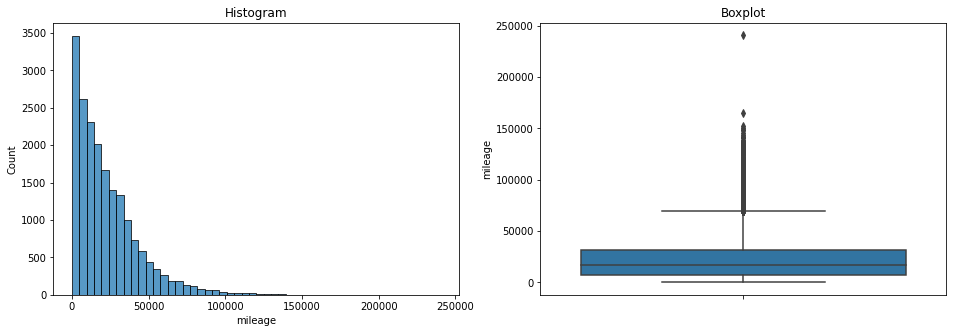



Skewness of mileage in X_train :  1.6853642649586598


In [109]:
# X_train mileage outlier visualization
diagnosticPlot(X_train, 'mileage')
print('\n')

# Check skewness
print('Skewness of mileage in X_train : ', X_train.mileage.skew())

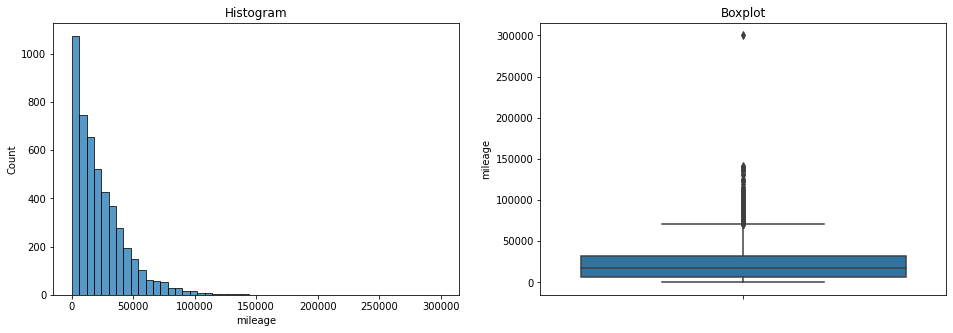



Skewness of mileage in X_test :  1.9391687832079265


In [110]:
# X_test mileage outlier visualization
diagnosticPlot(X_test, 'mileage')
print('\n')

# Check skewness
print('Skewness of mileage in X_test : ', X_test.mileage.skew())

Dari kedua *graphic* diatas dapat disimpulkan untuk data `mileage` cenderung *Right Extreme Skewness* dengan nilai *skewness* yang hampir mirip untuk kedua data dimana *skewness* X_train di nilai `1.6853642649586598` dan X_test di nilai `1.9391687832079265`. Saya akan coba handle outlier ini dengan metode *Capping*

In [111]:
# Create the capper
winsorizer = Winsorizer(capping_method = 'iqr',
                      tail = 'right',
                      fold = 1.5, 
                      variables=['mileage'])

X_trainCapper = winsorizer.fit_transform(X_train)
X_testCapper = winsorizer.transform(X_test)

In [112]:
# Inspecting the capper
print('Right tail of capper : ', winsorizer.right_tail_caps_)

Right tail of capper :  {'mileage': 69563.375}


dapat disimpulkan bahwa nilai ouliers dari `mileage` start dari `69563.375`, maka nilai diatas itu akan dianggap outliers

In [113]:
# Describe dataset
print('X_train before capping : ')
print(X_train.describe())
print('X_train after capping : ')
print(X_trainCapper.describe())
print('X_test before capping :')
print(X_test.describe())
print('X_test after capping :')
print(X_testCapper.describe())

X_train before capping : 
               year        mileage           tax           mpg    engineSize
count  19200.000000   19200.000000  19200.000000  19200.000000  19200.000000
mean    2017.175260   22635.582656    122.119531     54.547199      1.674792
std        2.054232   20827.615934     60.141798     16.702325      0.554882
min     1970.000000       1.000000      0.000000      1.100000      0.000000
25%     2016.000000    6957.750000    125.000000     45.600000      1.300000
50%     2017.000000   17138.500000    145.000000     54.300000      1.600000
75%     2019.000000   32000.000000    145.000000     61.400000      2.000000
max     2020.000000  240494.000000    580.000000    470.800000      6.200000
X_train after capping : 
               year       mileage           tax           mpg    engineSize
count  19200.000000  19200.000000  19200.000000  19200.000000  19200.000000
mean    2017.175260  21916.434876    122.119531     54.547199      1.674792
std        2.054232  18437.9

dapat disimpulkan setelah di capping data maximal akan berubah sesuai dari nilai outlier yaitu `69563.375`

X_train before Capping


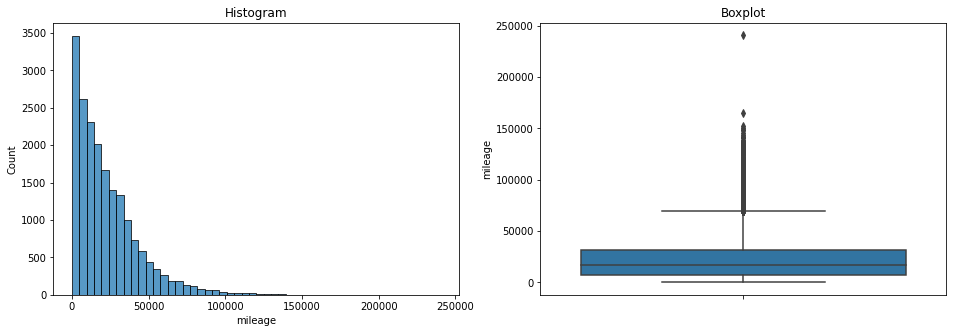


 X_train after Capping


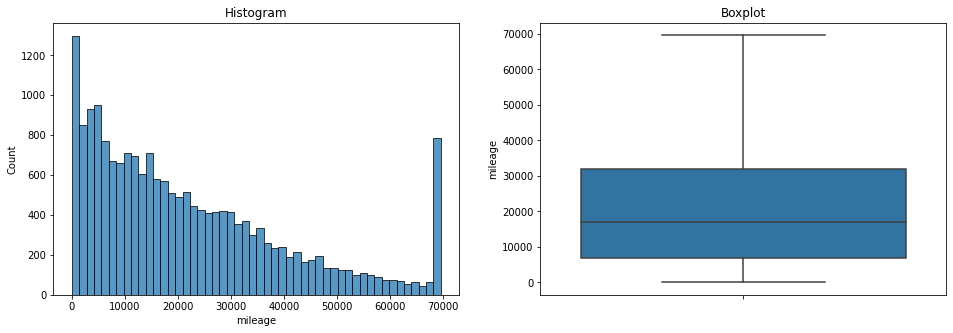

X_test before Capping


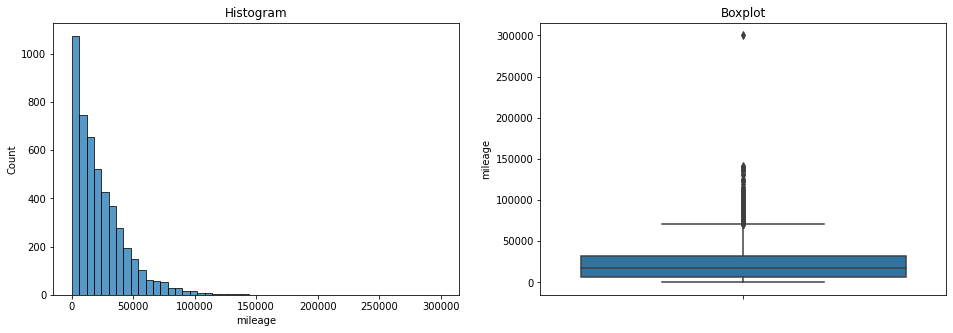


 X_test after Capping


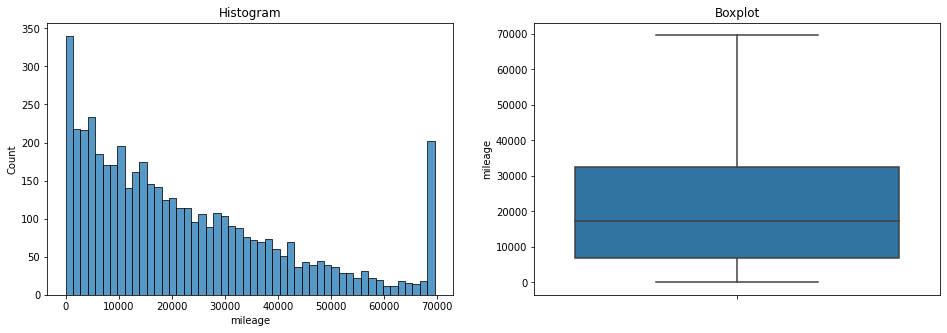

In [114]:
# Visualization after capping
print('X_train before Capping')
diagnosticPlot(X_train, 'mileage')
print('\n X_train after Capping')
diagnosticPlot(X_trainCapper, 'mileage')
print('X_test before Capping')
diagnosticPlot(X_test, 'mileage')
print('\n X_test after Capping')
diagnosticPlot(X_testCapper, 'mileage')

data outlier berhasil ditangani dengan metoda `Capping/Winsorizer`

## 5.5 Feature Selection

In [115]:
# show X_train data
X_trainCapper

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
10784,Mercedez,C Class,2016,Automatic,30385.000,Diesel,30,65.7,2.1
7581,BMW,1 Series,2017,Manual,24985.000,Diesel,145,70.6,1.5
12706,Audi,A1,2019,Semi-Auto,1000.000,Petrol,145,44.1,1.0
19968,Skoda,Scala,2019,Semi-Auto,469.000,Diesel,145,54.3,1.6
16867,Mercedez,C Class,2017,Automatic,47019.000,Hybrid,0,134.5,2.0
...,...,...,...,...,...,...,...,...,...
1043,BMW,5 Series,2016,Manual,69563.375,Diesel,30,65.7,2.0
21416,Skoda,Fabia,2019,Manual,1000.000,Petrol,145,49.6,1.0
1378,VW,Golf,2015,Semi-Auto,44520.000,Petrol,200,39.8,2.0
17141,BMW,1 Series,2014,Manual,34902.000,Petrol,145,50.4,1.6


ada `19,200` data dalam X_train

In [116]:
# Drop column tax in X_train and X_test
X_trainCapper.drop(columns = ['tax'], axis=1, inplace=True)
X_testCapper.drop(columns = ['tax'], axis=1, inplace=True)

# Show after drop
X_trainCapper

,brand,model,year,transmission,mileage,fuelType,mpg,engineSize
10784,Mercedez,C Class,2016,Automatic,30385.000,Diesel,65.7,2.1
7581,BMW,1 Series,2017,Manual,24985.000,Diesel,70.6,1.5
12706,Audi,A1,2019,Semi-Auto,1000.000,Petrol,44.1,1.0
19968,Skoda,Scala,2019,Semi-Auto,469.000,Diesel,54.3,1.6
16867,Mercedez,C Class,2017,Automatic,47019.000,Hybrid,134.5,2.0
...,...,...,...,...,...,...,...,...
1043,BMW,5 Series,2016,Manual,69563.375,Diesel,65.7,2.0
21416,Skoda,Fabia,2019,Manual,1000.000,Petrol,49.6,1.0
1378,VW,Golf,2015,Semi-Auto,44520.000,Petrol,39.8,2.0
17141,BMW,1 Series,2014,Manual,34902.000,Petrol,50.4,1.6


saya berasumsi bahwa nilai `tax` tidak berpengaruh terhadap harga mobil bekas

## 5.6 Split between Numerical and Categorical Data

In [117]:
# Get numerical and categorical data
numColumn = X_trainCapper.select_dtypes(include = np.number).columns.tolist()
catColumn = X_trainCapper.select_dtypes(include = ['object']).columns.tolist()

# Show after split
print('Numerical Data   : ', numColumn)
print('Categorical Data : ', catColumn)

Numerical Data   :  ['year', 'mileage', 'mpg', 'engineSize']
Categorical Data :  ['brand', 'model', 'transmission', 'fuelType']


In [118]:
# Split between X_train and X_test
# Numerical data
X_trainNum = X_trainCapper[numColumn]
X_testNum = X_testCapper[numColumn]

# Categorical data
X_trainCat = X_trainCapper[catColumn]
X_testCat = X_testCapper[catColumn]

# Display after split
X_trainNum

,year,mileage,mpg,engineSize
10784,2016,30385.000,65.7,2.1
7581,2017,24985.000,70.6,1.5
12706,2019,1000.000,44.1,1.0
19968,2019,469.000,54.3,1.6
16867,2017,47019.000,134.5,2.0
...,...,...,...,...
1043,2016,69563.375,65.7,2.0
21416,2019,1000.000,49.6,1.0
1378,2015,44520.000,39.8,2.0
17141,2014,34902.000,50.4,1.6


## 5.7 Feature Scalling

Saya akan menggunakan Min Max Scaler pada bagian ini

In [119]:
# MinMaxScaler Function
scaler = MinMaxScaler()
scaler.fit(X_trainNum)

# Apply function to X_train and X_test
X_trainNumScaled = scaler.transform(X_trainNum)
X_testNumScaled = scaler.transform(X_testNum)

# Displaying shape
print('X_train setelah di scaling : ', X_trainNumScaled)
print('\n')
print('Panjang data di X_train setelah scaling : ', X_trainNumScaled.shape)

X_train setelah di scaling :  [[0.92       0.43678785 0.1375346  0.33870968]
 [0.94       0.35915968 0.14796679 0.24193548]
 [0.98       0.01436121 0.0915478  0.16129032]
 ...
 [0.9        0.63998677 0.08239302 0.32258065]
 [0.88       0.50172238 0.10496061 0.25806452]
 [0.94       0.14770916 0.12561209 0.16129032]]


Panjang data di X_train setelah scaling :  (19200, 4)


Berikut adalah hasil scaling data kategori *Numerical* dengan banyak data `19200` baris dan `4` kolom

## 5.8 Feature Encoding

Saya akan menggunakan label encoder pada bagian ini

In [120]:
# Display data categorical
X_trainCat

,brand,model,transmission,fuelType
10784,Mercedez,C Class,Automatic,Diesel
7581,BMW,1 Series,Manual,Diesel
12706,Audi,A1,Semi-Auto,Petrol
19968,Skoda,Scala,Semi-Auto,Diesel
16867,Mercedez,C Class,Automatic,Hybrid
...,...,...,...,...
1043,BMW,5 Series,Manual,Diesel
21416,Skoda,Fabia,Manual,Petrol
1378,VW,Golf,Semi-Auto,Petrol
17141,BMW,1 Series,Manual,Petrol


In [121]:
# Check unique value of each column
print('Unique value column brand : ')
print(X_trainCat.brand.unique())
print('\n')
print('Unique value column model : ')
print(X_trainCat.model.unique())
print('\n')
print('Unique value transmission brand : ')
print(X_trainCat.transmission.unique())
print('\n')
print('Unique value fuelType brand : ')
print(X_trainCat.fuelType.unique())

Unique value column brand : 
['Mercedez' 'BMW' 'Audi' 'Skoda' 'Hyundai' 'Ford' 'Vauxhall' 'VW']


Unique value column model : 
[' C Class' ' 1 Series' ' A1' ' Scala' ' I20' ' Fiesta' ' Q3' ' Mokka X'
 ' Golf' ' A4' ' Yeti Outdoor' ' Insignia' ' Tucson' ' Polo' ' T-Roc'
 ' Fabia' ' Kamiq' ' Kodiaq' ' Corsa' ' SL CLASS' ' 3 Series' ' A5'
 ' GLA Class' ' X1' ' Karoq' ' I30' ' Tiguan' ' A Class' ' Citigo'
 ' Octavia' ' E Class' ' Viva' ' I10' ' A3' ' B-MAX' ' Ioniq' ' Passat'
 ' 4 Series' ' Superb' ' Mokka' ' Caravelle' ' Up' ' GLE Class' ' V Class'
 ' Focus' ' 6 Series' ' Kona' ' Zafira' ' Astra' ' Yeti' ' Grandland X'
 ' Q2' ' A6' ' TT' ' Grand Tourneo Connect' ' I40' ' Scirocco' ' Ka+'
 ' Mondeo' ' X3' ' X2' ' KA' ' 2 Series' ' Amarok' ' 5 Series' ' Q5' ' X6'
 ' Kuga' ' Santa Fe' ' CLS Class' ' M4' ' Sharan' ' GTC' ' Touran' ' X5'
 ' X-CLASS' ' EcoSport' ' B Class' ' Q7' ' Z4' ' CL Class' ' Golf SV'
 ' Galaxy' ' X4' ' CLA Class' ' S-MAX' ' Arteon' ' I800' ' Edge'
 ' Combo Life' ' Vivaro

berikut masing-masing data categorical di masing-masing kolom

In [122]:
# Label Encoder function
encoder = LabelEncoder()

# Apply function
X_trainCat['brand_enc'] = encoder.fit_transform(X_trainCat['brand'])
X_trainCat['model_enc'] = encoder.fit_transform(X_trainCat['model'])
X_trainCat['transmission_enc'] = encoder.fit_transform(X_trainCat['transmission'])
X_trainCat['fuelType_enc'] = encoder.fit_transform(X_trainCat['fuelType'])

# Display after encoding
X_trainCat

<ipython-input-122-11d396c05131>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trainCat['brand_enc'] = encoder.fit_transform(X_trainCat['brand'])
<ipython-input-122-11d396c05131>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_trainCat['model_enc'] = encoder.fit_transform(X_trainCat['model'])
<ipython-input-122-11d396c05131>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,brand,model,transmission,fuelType,brand_enc,model_enc,transmission_enc,fuelType_enc
10784,Mercedez,C Class,Automatic,Diesel,4,26,0,0
7581,BMW,1 Series,Manual,Diesel,1,0,1,0
12706,Audi,A1,Semi-Auto,Petrol,0,9,3,4
19968,Skoda,Scala,Semi-Auto,Diesel,5,121,3,0
16867,Mercedez,C Class,Automatic,Hybrid,4,26,0,2
...,...,...,...,...,...,...,...,...
1043,BMW,5 Series,Manual,Diesel,1,4,1,0
21416,Skoda,Fabia,Manual,Petrol,5,47,1,4
1378,VW,Golf,Semi-Auto,Petrol,6,61,3,4
17141,BMW,1 Series,Manual,Petrol,1,0,1,4


In [123]:
# Label Encoder function
encoder = LabelEncoder()

# Apply function to X_test
X_testCat['brand_enc'] = encoder.fit_transform(X_test['brand'])
X_testCat['model_enc'] = encoder.fit_transform(X_test['model'])
X_testCat['transmission_enc'] = encoder.fit_transform(X_test['transmission'])
X_testCat['fuelType_enc'] = encoder.fit_transform(X_test['fuelType'])

<ipython-input-123-aa99ad4a3473>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testCat['brand_enc'] = encoder.fit_transform(X_test['brand'])
<ipython-input-123-aa99ad4a3473>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testCat['model_enc'] = encoder.fit_transform(X_test['model'])
<ipython-input-123-aa99ad4a3473>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [124]:
# Drop column after encoding
X_trainCat.drop(['brand', 'model', 'transmission', 'fuelType'], axis=1, inplace=True)
X_testCat.drop(['brand', 'model', 'transmission', 'fuelType'], axis=1, inplace=True)

# Display after drop
X_trainCat

,brand_enc,model_enc,transmission_enc,fuelType_enc
10784,4,26,0,0
7581,1,0,1,0
12706,0,9,3,4
19968,5,121,3,0
16867,4,26,0,2
...,...,...,...,...
1043,1,4,1,0
21416,5,47,1,4
1378,6,61,3,4
17141,1,0,1,4


## 5.9 Concate between Numerical and Categorical Column

In [125]:
# Concate column numical and categorical
X_trainFinal = np.concatenate([X_trainNumScaled, X_trainCat], axis=1)
X_testFinal = np.concatenate([X_testNumScaled, X_testCat], axis=1)

# display data
X_trainFinal

array([[9.20000000e-01, 4.36787847e-01, 1.37534597e-01, ...,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00],
       [9.40000000e-01, 3.59159675e-01, 1.47966787e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.80000000e-01, 1.43612118e-02, 9.15477965e-02, ...,
        9.00000000e+00, 3.00000000e+00, 4.00000000e+00],
       ...,
       [9.00000000e-01, 6.39986774e-01, 8.23930168e-02, ...,
        6.10000000e+01, 3.00000000e+00, 4.00000000e+00],
       [8.80000000e-01, 5.01722375e-01, 1.04960613e-01, ...,
        0.00000000e+00, 1.00000000e+00, 4.00000000e+00],
       [9.40000000e-01, 1.47709160e-01, 1.25612093e-01, ...,
        4.90000000e+01, 1.00000000e+00, 4.00000000e+00]])

In [126]:
# Crate dataframe after concate
X_trainFinalDF = pd.DataFrame(X_trainFinal, columns=[numColumn + catColumn])
X_trainFinalDF

,year,mileage,mpg,engineSize,brand,model,transmission,fuelType
0,0.92,0.436788,0.137535,0.338710,4.0,26.0,0.0,0.0
1,0.94,0.359160,0.147967,0.241935,1.0,0.0,1.0,0.0
2,0.98,0.014361,0.091548,0.161290,0.0,9.0,3.0,4.0
3,0.98,0.006728,0.113264,0.258065,5.0,121.0,3.0,0.0
4,0.94,0.675911,0.284011,0.322581,4.0,26.0,0.0,2.0
...,...,...,...,...,...,...,...,...
19195,0.92,1.000000,0.137535,0.322581,1.0,4.0,1.0,0.0
19196,0.98,0.014361,0.103257,0.161290,5.0,47.0,1.0,4.0
19197,0.90,0.639987,0.082393,0.322581,6.0,61.0,3.0,4.0
19198,0.88,0.501722,0.104961,0.258065,1.0,0.0,1.0,4.0


# 6. Model Definition

---



Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [127]:
# Apply Linear Regression
modelLinReg = LinearRegression()

Alasan :
1. Penggunaan *Linear Regression*
  - *Linear Regression* tergolong mudah diaplikasikan dan dapat digunakan untuk membuat estimasi prediksi hubungan antara variabel independen dan dependen dan digunakan juga untuk menetapkan adanya korelasi hubungan antar variabel

2. Metrics yang akan dipakai adalah *Mean Absolute Error (MAE)*
  - Metrics ini lebih mudah diaplikasikan
  - Dapat mudah dimengerti oleh data non-scientis karena menggunakan nilai error rata-rata data.

# 7. Model Training


---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [128]:
# Training the model with Linear Regression
modelLinReg.fit(X_trainFinal, y_train)

LinearRegression()

# 8. Model Evaluation

---



Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [129]:
# Function to predict train-set and test-set
y_pred_train = modelLinReg.predict(X_trainFinal)
y_pred_test = modelLinReg.predict(X_testFinal)

# Display after predict
y_pred_train

array([17001.50181873, 13925.02586646, 17320.81569414, ...,
       14763.61238077, 10671.17215662, 11459.91964731])

berikut hasil prediksinya

In [130]:
# Find mean value from y_train and y_test
print('Mean Value of y_train : ', y_train.mean())
print('Mean Value of y_test  : ', y_test.mean())

Mean Value of y_train :  17139.291822916668
Mean Value of y_test  :  17216.16375


berikut nilai mean dari y_train and y_test

In [131]:
# find error with MAE
print('Error - Train-set  : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Train-set  : ', mean_absolute_error(y_test, y_pred_test))

Error - Train-set  :  3434.5896918978947
Error - Train-set  :  3481.44142672063


nilai error untuk `price` baik di train-set maupun test-set hampir mirip dengan kisaran nilainya di +- 3400 an

Statement :
1. Model masih termasuk *under fitting* karena nilai *Mean Absolute Error* masih tergolong besar. hal ini bisa dikaitkan adanya kesalahan dalam pengambilan metode untuk penanganan outlier. Mungkin berbeda hasilnya jika menggunakan teknik lain dalam menangani outliernya
2. Dalam hal *bussiness* hal ini bisa mengakibatkan kerugian yang cukup besar karena nilai prediksinya akan terpaut 3400an dari nilai aktual yang ada di pasar

# 9. Model Saving

---



Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [132]:
# Saving the file
with open('ModelLinearRegression.pkl', 'wb') as file1:
  pickle.dump(modelLinReg, file1)

with open('Model_scaler.pkl', 'wb') as file2:
  pickle.dump(scaler, file2)

with open('Model_Encoder.pkl', 'wb') as file3:
  pickle.dump(encoder, file3)

with open('List_Numerical.txt', 'w') as file4:
  json.dump(numColumn, file4)

with open('List_Categorical.txt', 'w') as file5:
  json.dump(catColumn, file5)

# 10. Model Inference

---



Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [133]:
# Get sample data
infData = copyData.sample(20, random_state=19)
infData

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8303,Hyundai,I20,2014,4498,Manual,49854,Petrol,30,57.6,1.2
7927,Skoda,Octavia,2019,16495,Manual,3851,Diesel,145,55.4,1.6
21106,Audi,A6,2016,20000,Semi-Auto,24000,Diesel,30,61.4,2.0
20497,BMW,3 Series,2016,18080,Automatic,22186,Petrol,200,43.5,2.0
13738,BMW,1 Series,2014,10670,Automatic,53436,Diesel,30,64.2,2.0
16688,VW,Golf,2016,13795,Automatic,24463,Other,30,53.3,1.4
23744,BMW,1 Series,2019,21875,Manual,13252,Petrol,145,41.5,1.5
13016,Skoda,Superb,2019,26990,Semi-Auto,4000,Diesel,145,47.1,2.0
7099,Ford,Fiesta,2018,11170,Manual,10442,Petrol,145,58.9,1.0
23375,Mercedez,E Class,2017,24900,Automatic,17736,Diesel,145,58.9,2.0


saya mengambil sampel sebanyak 20 data dari data awal untuk kemudian dibuat prediksinya

In [134]:
# drop unused column
infData.drop(columns=['tax'], axis=1, inplace=True)

# Display
infData

,brand,model,year,price,transmission,mileage,fuelType,mpg,engineSize
8303,Hyundai,I20,2014,4498,Manual,49854,Petrol,57.6,1.2
7927,Skoda,Octavia,2019,16495,Manual,3851,Diesel,55.4,1.6
21106,Audi,A6,2016,20000,Semi-Auto,24000,Diesel,61.4,2.0
20497,BMW,3 Series,2016,18080,Automatic,22186,Petrol,43.5,2.0
13738,BMW,1 Series,2014,10670,Automatic,53436,Diesel,64.2,2.0
16688,VW,Golf,2016,13795,Automatic,24463,Other,53.3,1.4
23744,BMW,1 Series,2019,21875,Manual,13252,Petrol,41.5,1.5
13016,Skoda,Superb,2019,26990,Semi-Auto,4000,Diesel,47.1,2.0
7099,Ford,Fiesta,2018,11170,Manual,10442,Petrol,58.9,1.0
23375,Mercedez,E Class,2017,24900,Automatic,17736,Diesel,58.9,2.0


berikut data yang sudah di drop column `tax`

In [135]:
# reset index data inference
infData = infData.reset_index()

In [136]:
# Split data numerical and categorical
infDataNum = infData[numColumn]
infDataCat = infData[catColumn]

# Display
infDataNum

,year,mileage,mpg,engineSize
0,2014,49854,57.6,1.2
1,2019,3851,55.4,1.6
2,2016,24000,61.4,2.0
3,2016,22186,43.5,2.0
4,2014,53436,64.2,2.0
5,2016,24463,53.3,1.4
6,2019,13252,41.5,1.5
7,2019,4000,47.1,2.0
8,2018,10442,58.9,1.0
9,2017,17736,58.9,2.0


In [137]:
# Display categorical
infDataCat

,brand,model,transmission,fuelType
0,Hyundai,I20,Manual,Petrol
1,Skoda,Octavia,Manual,Diesel
2,Audi,A6,Semi-Auto,Diesel
3,BMW,3 Series,Automatic,Petrol
4,BMW,1 Series,Automatic,Diesel
5,VW,Golf,Automatic,Other
6,BMW,1 Series,Manual,Petrol
7,Skoda,Superb,Semi-Auto,Diesel
8,Ford,Fiesta,Manual,Petrol
9,Mercedez,E Class,Automatic,Diesel


In [ ]:
# Feature Scaling and Encoding
# Scaling numerical
infDataNumScaled = scaler.transform(infDataNum)

# Encoding Categorical
infDataCat['brand_enc'] = encoder.fit_transform(infDataCat['brand'])
infDataCat['model_enc'] = encoder.fit_transform(infDataCat['model'])
infDataCat['transmission_enc'] = encoder.fit_transform(infDataCat['transmission'])
infDataCat['fuelType_enc'] = encoder.fit_transform(infDataCat['fuelType'])

# Drop data unused in model inference
infDataCat.drop(columns=['brand', 'model', 'transmission','fuelType'], axis=1, inplace=True)
infDataCat

# Concate data numerical and categorical
infDataFinal = np.concatenate([infDataNumScaled, infDataCat], axis=1)

In [139]:
# Predicting data
y_pred_inf = modelLinReg.predict(infDataFinal)
y_pred_inf

array([ 2180.26286297, 18788.86395191, 19674.04398761, 18971.34644194,
       11080.05280793,  8337.08495736, 19213.77136604, 24111.1542797 ,
       11602.34785324, 18681.88839943, 18771.13392406, 23302.05303628,
        8510.57479893, 11900.7848919 , 15120.08119411, 16260.9462599 ,
       10465.20167072, 14772.94311746, 18120.16626138, 12774.90296406])

In [140]:
# Create dataframe predict
y_pred_infDF = pd.DataFrame(y_pred_inf, columns=['predictPrice'])
y_pred_infDF

,predictPrice
0,2180.262863
1,18788.863952
2,19674.043988
3,18971.346442
4,11080.052808
5,8337.084957
6,19213.771366
7,24111.154280
8,11602.347853
9,18681.888399


ini nilai prediksi dari data inference

In [141]:
# Group data inference and predict
final_predDF = pd.concat([infData, y_pred_infDF], axis=1)
final_predDF

,index,brand,model,year,price,transmission,mileage,fuelType,mpg,engineSize,predictPrice
0,8303,Hyundai,I20,2014,4498,Manual,49854,Petrol,57.6,1.2,2180.262863
1,7927,Skoda,Octavia,2019,16495,Manual,3851,Diesel,55.4,1.6,18788.863952
2,21106,Audi,A6,2016,20000,Semi-Auto,24000,Diesel,61.4,2.0,19674.043988
3,20497,BMW,3 Series,2016,18080,Automatic,22186,Petrol,43.5,2.0,18971.346442
4,13738,BMW,1 Series,2014,10670,Automatic,53436,Diesel,64.2,2.0,11080.052808
5,16688,VW,Golf,2016,13795,Automatic,24463,Other,53.3,1.4,8337.084957
6,23744,BMW,1 Series,2019,21875,Manual,13252,Petrol,41.5,1.5,19213.771366
7,13016,Skoda,Superb,2019,26990,Semi-Auto,4000,Diesel,47.1,2.0,24111.154280
8,7099,Ford,Fiesta,2018,11170,Manual,10442,Petrol,58.9,1.0,11602.347853
9,23375,Mercedez,E Class,2017,24900,Automatic,17736,Diesel,58.9,2.0,18681.888399


Berikut hasil concat antara data inference dengan hasil prediksi, dapat disimpulkan bahwa memang adanya perbedaan aktual dari nilai price dengan nilai predictPrice. Hal ini terjadi kemungkinan adanya kesalahan dalam pengambilan keputusan dalam penggunaan metoda outlier handling dengan menggunakan capping.

# 11. Kesimpulan


---



1. mobil dengan status super efficient dimana mpg >= 60 menempati urutan  pertama dengan total sebanyak 8,091 dan mobil dengan status not efficient dimana mpg < 25 paling sedikit sebanyak 62
2. persebaran distribusi data dari mileage cenderung right extremen skewness dengan nilai skewness `1.7383065406791738`
3. Selisih nilai mean antara train dan test tidak terlalu besar
4. model yang digunakan adalah linear regression yang jika menggunakan model lain kemungkinan akan berbeda hasil prediksinya
5. untuk improvment selanjutnya mungkin kita bisa menggunakan metoda lain dalam handling outlier dan penggunaan metode lain dalam hal model training agar didapatkan hasil dengan nilai error yang lebih rendah